In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from collections import Counter
import datetime
print 'Done'

Done


In [ ]:
import json
import pandas

#Function to read Tweets
def readTweets(path):
    data = open(path)
    itemlist = []
    for line in data:
        item = json.loads(line)
        itemlist.append(item)
    return itemlist

def createDF(TweetList):
    df = pandas.DataFrame(data=TweetList)
    return df

def colTypeViewer(df):
    rowManager = 0
    for key in df.columns.values:
        print key, str(type(df[key][0]))
        rowManager+=1
        if rowManager == 2:
            rowManager = 0
            print('')

In [ ]:
iPhoneTweets = createDF(readTweets('Before - iPhoneX_Tweets.json'))

print('Dataset Dimensions:')
print('\tNumber of Keys (Columns): ' + str(iPhoneTweets.shape[0]))
print('\tNumber of Entries (Rows): ' + str(iPhoneTweets.shape[1]))

In [ ]:
iPhoneTweets.head()

In [ ]:
# Extracting data from Tweet Dataset
tweetText = createDF(iPhoneTweets['text'])
#print('Rows: ' + str(tweetTimes.shape[0]))
#print('Columns: ' + str(tweetTimes.shape[1]))
tweetText.text.head(10)

In [ ]:
#python -m pip install wordcloud -in terminal
import nltk
from nltk.corpus import stopwords
valid_words = set(nltk.corpus.words.words())

In [ ]:
def clean_tweet(data):
    cleaned_word = [x.encode('UTF8') for x in data] 
    cleaned_word = nltk.word_tokenize(str(cleaned_word))
    cleaned_word = [x for x in cleaned_word if len(x)>1]
    cleaned_word = [x for x in cleaned_word if x not in stopwords.words('english')]
    cleaned_word = [x for x in cleaned_word if x in valid_words]
    cleaned_word = [str.lower(i) for i in cleaned_word ]
    #print cleaned_word
    return cleaned_word

In [ ]:
clean_tweet = clean_tweet(tweetText.text)
clean_df = createDF(clean_tweet)
clean_df.head()

In [ ]:
#clean_df.to_csv('clean_tweet_words.csv', encoding='utf-8')
top_words  = createDF(clean_df.apply(lambda x: x.str.split(expand=True).stack()).stack().value_counts())
top_words = top_words.reset_index()
top_words.columns = ['word','count']
top_words.head()

In [ ]:
top_df = top_words.sort_values('count', ascending=False)
top_df = top_df.head(15)
top_df

In [ ]:
import pandas as pd
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x = 'word', y = 'count', data = top_df)
plt.show()
fig.savefig('top_words_before_launch.png')

All frequencies, including STOPWORDS:
                         Word  Frequency
0  (coincidence, coincidence)       2638
1                (order, new)       1511
2          (trying, preorder)       1461
3             (preorder, new)       1418
4         (present, stickers)       1307
5          (stickers, belong)       1307
6                 (sell, car)       1286
7                (car, house)       1286
8           (house, whatever)       1279
9                (one, first)        919


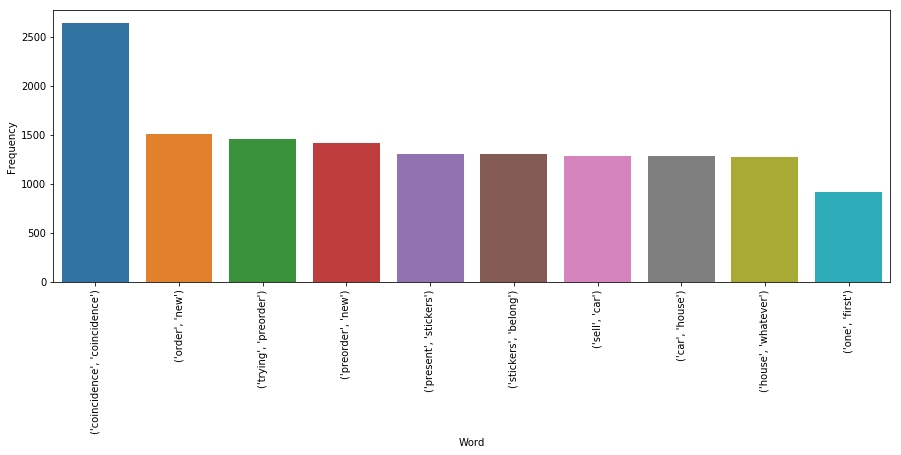

In [62]:
bgs2 = nltk.bigrams(clean_tweet)

# compute frequency distribution for all the bigrams 
fdist2 = nltk.FreqDist(bgs2)

rslt2 = pd.DataFrame(Counter(fdist2).most_common(10),columns=['Word', 'Frequency'])
print('All frequencies, including STOPWORDS:')
print('=' * 60)
print(rslt2)
print('=' * 60)


fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x = 'Word', y = 'Frequency', data = rslt2)
plt.xticks(rotation= 90)
plt.show()
fig.savefig('bigram_before_launch.png',bbox_inches = 'tight')